In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport
from scipy import stats

In [109]:
def metric_score(pred_, test_):
    sc = accuracy_score(pred_, test_)
    ps = precision_score(pred_, test_)
    rs = recall_score(pred_, test_)
    print(f'{round(sc  * 100)}% accuracy, {round(ps * 100)}% precision and {round(rs  * 100)}% recall')

In [107]:
def plot_(y_t, y_p, model):
    fig, (ax2) = plt.subplots(figsize = (8,6))
    fpr, tpr, thresholds_roc = roc_curve(y_t,y_p)
    roc_auc = auc(fpr,tpr)
    ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
    ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
    ax2.set_xlabel("False Positive Rate", fontsize = 14)
    ax2.set_ylabel("True Positive Rate", fontsize = 14)
    ax2.set_title("ROC Curve", fontsize = 18)
    ax2.legend(loc = 'best')
    plt.title(f'ROC curve for {model}')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    close_default = np.argmin(np.abs(thresholds_roc - 0.5))
    ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
    plt.tight_layout()

In [10]:
raw_data = pd.read_csv('training_dataframe.csv')

In [11]:
raw_data.head(5)

,video_name,angry,disgust,fear,happy,sad,surprise,neutral,age,gender,keyword_confidence,keyword_match_per,sentiment_positive,sentiment_neutral,sentiment_negative,Target
0,16660847_500.mp4,0.00,0.0,0.00,0.00,0.90,0.00,0.05,25,Male,"{'A': 100, 'B': 1, 'C': 1, 'D': 1}",25,0.00,1.00,0.00,1
1,16660847_501.mp4,0.00,0.0,0.15,0.00,0.75,0.05,0.00,0,2,"{'A': 100, 'B': 0, 'C': 0, 'D': 0}",25,0.08,0.92,0.00,1
2,16660847_502.mp4,0.00,0.0,0.00,0.00,0.90,0.00,0.05,23,Male,"{'A': 100, 'B': 1, 'C': 0, 'D': 0}",25,0.00,0.94,0.06,1
3,16660847_503.mp4,0.00,0.0,0.17,0.00,0.78,0.00,0.00,28,Male,"{'A': 100, 'B': 1, 'C': 0, 'D': 1}",25,0.06,0.94,0.00,1
4,16660849_546.mp4,0.22,0.0,0.18,0.09,0.29,0.00,0.20,25,Male,"{'A': 0, 'B': 0, 'C': 0, 'D': 0}",0,0.00,1.00,0.00,1


In [12]:
raw_data.describe(include='all')

,video_name,angry,disgust,fear,happy,sad,surprise,neutral,age,gender,keyword_confidence,keyword_match_per,sentiment_positive,sentiment_neutral,sentiment_negative,Target
count,1327,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000,1327,1327,1327.000000,1327.000000,1327.000000,1327.000000,1327.000000
unique,1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,138,NaN,NaN,NaN,NaN,NaN
top,16660847_500.mp4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,"{'A': 100, 'B': 0, 'C': 0, 'D': 0}",NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,729,227,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.037174,0.000671,0.148161,0.059382,0.182313,0.015848,0.523610,19.737754,NaN,NaN,14.562924,0.049480,0.938267,0.012170,0.376790
std,NaN,0.098301,0.008886,0.181770,0.114500,0.214370,0.053209,0.302555,8.917873,NaN,NaN,15.177345,0.049938,0.054626,0.021969,0.484764
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.500000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.265000,18.000000,NaN,NaN,0.000000,0.000000,0.910000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.090000,0.010000,0.100000,0.000000,0.540000,21.000000,NaN,NaN,25.000000,0.040000,0.940000,0.000000,0.000000
75%,NaN,0.030000,0.000000,0.210000,0.060000,0.260000,0.000000,0.790000,25.000000,NaN,NaN,25.000000,0.080000,0.990000,0.020000,1.000000


In [13]:
raw_data.columns

Index(['video_name', 'angry', 'disgust', 'fear', 'happy', 'sad', 'surprise',
       'neutral', 'age', 'gender', 'keyword_confidence', 'keyword_match_per',
       'sentiment_positive', 'sentiment_neutral', 'sentiment_negative',
       'Target'],
      dtype='object')

In [14]:
video_names = raw_data['video_name']

In [15]:
raw_data.drop(columns=['video_name','keyword_confidence','age', 'gender'], axis=1, inplace=True)

In [16]:
raw_data

,angry,disgust,fear,happy,sad,surprise,neutral,keyword_match_per,sentiment_positive,sentiment_neutral,sentiment_negative,Target
0,0.00,0.00,0.00,0.00,0.90,0.00,0.05,25,0.00,1.00,0.00,1
1,0.00,0.00,0.15,0.00,0.75,0.05,0.00,25,0.08,0.92,0.00,1
2,0.00,0.00,0.00,0.00,0.90,0.00,0.05,25,0.00,0.94,0.06,1
3,0.00,0.00,0.17,0.00,0.78,0.00,0.00,25,0.06,0.94,0.00,1
4,0.22,0.00,0.18,0.09,0.29,0.00,0.20,0,0.00,1.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1322,0.00,0.00,0.00,0.00,0.00,0.00,0.92,0,0.00,1.00,0.00,0
1323,0.00,0.00,0.00,0.00,0.00,0.00,0.91,0,0.00,1.00,0.00,0
1324,0.17,0.00,0.39,0.11,0.22,0.06,0.00,0,0.00,1.00,0.00,0
1325,0.06,0.02,0.35,0.13,0.15,0.00,0.27,50,0.05,0.93,0.02,1


In [17]:
raw_data.columns

Index(['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral',
       'keyword_match_per', 'sentiment_positive', 'sentiment_neutral',
       'sentiment_negative', 'Target'],
      dtype='object')

In [19]:
raw_data['keyword_match_per'] = raw_data['keyword_match_per'] /100

In [20]:
raw_data

,angry,disgust,fear,happy,sad,surprise,neutral,keyword_match_per,sentiment_positive,sentiment_neutral,sentiment_negative,Target
0,0.00,0.00,0.00,0.00,0.90,0.00,0.05,0.25,0.00,1.00,0.00,1
1,0.00,0.00,0.15,0.00,0.75,0.05,0.00,0.25,0.08,0.92,0.00,1
2,0.00,0.00,0.00,0.00,0.90,0.00,0.05,0.25,0.00,0.94,0.06,1
3,0.00,0.00,0.17,0.00,0.78,0.00,0.00,0.25,0.06,0.94,0.00,1
4,0.22,0.00,0.18,0.09,0.29,0.00,0.20,0.00,0.00,1.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1322,0.00,0.00,0.00,0.00,0.00,0.00,0.92,0.00,0.00,1.00,0.00,0
1323,0.00,0.00,0.00,0.00,0.00,0.00,0.91,0.00,0.00,1.00,0.00,0
1324,0.17,0.00,0.39,0.11,0.22,0.06,0.00,0.00,0.00,1.00,0.00,0
1325,0.06,0.02,0.35,0.13,0.15,0.00,0.27,0.50,0.05,0.93,0.02,1


In [30]:
cols_ = raw_data.columns.to_list()

In [33]:
cols_.remove('Target')

In [35]:
for i in cols_:
    if raw_data[i].dtype == np.float64:
        print('The Target column has {}% relation with {} column'.format(stats.pointbiserialr(raw_data['Target'], raw_data[i])[0]*100, i))

The Target column has -14.57092477277949% relation with angry column
The Target column has -4.29527933365719% relation with disgust column
The Target column has -32.36930397174086% relation with fear column
The Target column has -1.9171503429071974% relation with happy column
The Target column has -28.84454752391227% relation with sad column
The Target column has -11.413929204633584% relation with surprise column
The Target column has 47.672917675292155% relation with neutral column
The Target column has 17.871522899678855% relation with keyword_match_per column
The Target column has 4.1121275045977415% relation with sentiment_positive column
The Target column has -3.996697684882284% relation with sentiment_neutral column
The Target column has 0.5300180220142179% relation with sentiment_negative column


## Important columns are Emotion_Neutral, Emotion Fear, Emotion Sad, Emotion Neutral, keyword match %, Sentiment Positive

In [36]:
Y = raw_data.pop('Target')

In [37]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1322    0
1323    0
1324    0
1325    1
1326    0
Name: Target, Length: 1327, dtype: int64

In [39]:
X = raw_data

In [40]:
X.shape

(1327, 11)

In [41]:
Y.shape

(1327,)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=42)

In [120]:
log = LogisticRegression()
log.fit(X_train, y_train)
rfs = RandomForestClassifier()
rfs.fit(X_train, y_train)
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
gra = GradientBoostingClassifier()
gra.fit(X_train, y_train)
dec_ = DecisionTreeClassifier()
dec_.fit(X_train, y_train)
p = Perceptron()
p.fit(X_train, y_train)

Perceptron()

In [121]:
models = [log, rfs, ada, gra, dec_,p]

In [122]:
index = ['model_name','accuracy_score','precision','recall']
values = []

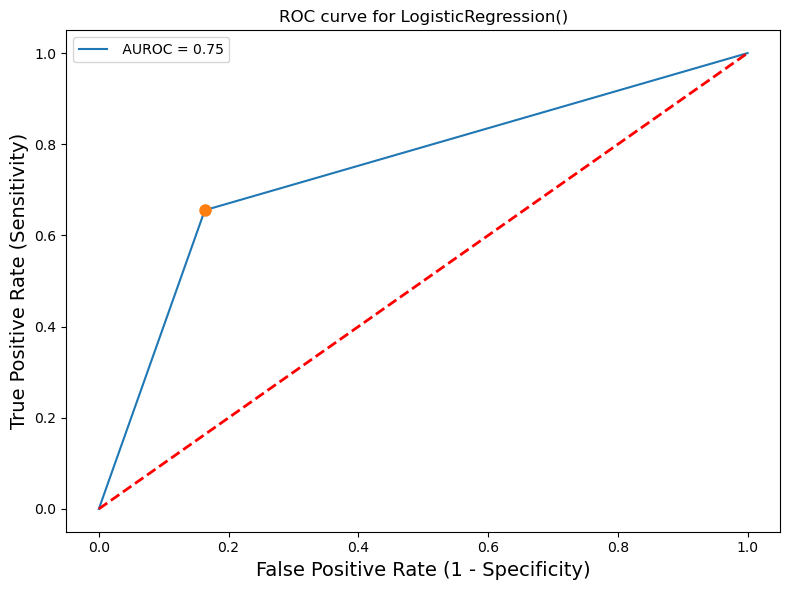

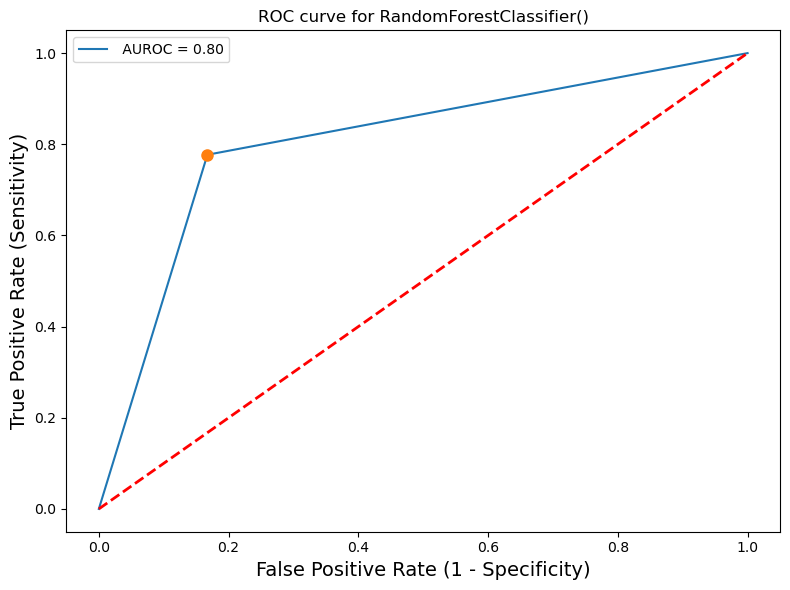

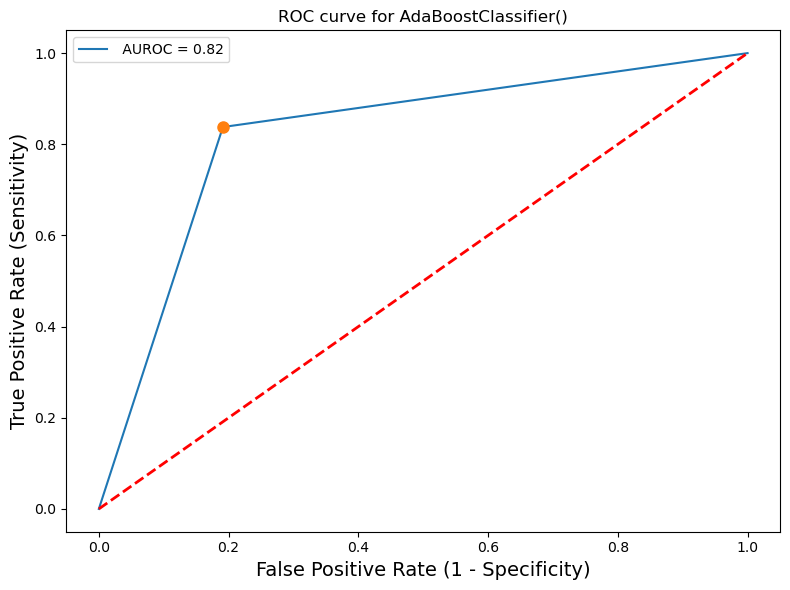

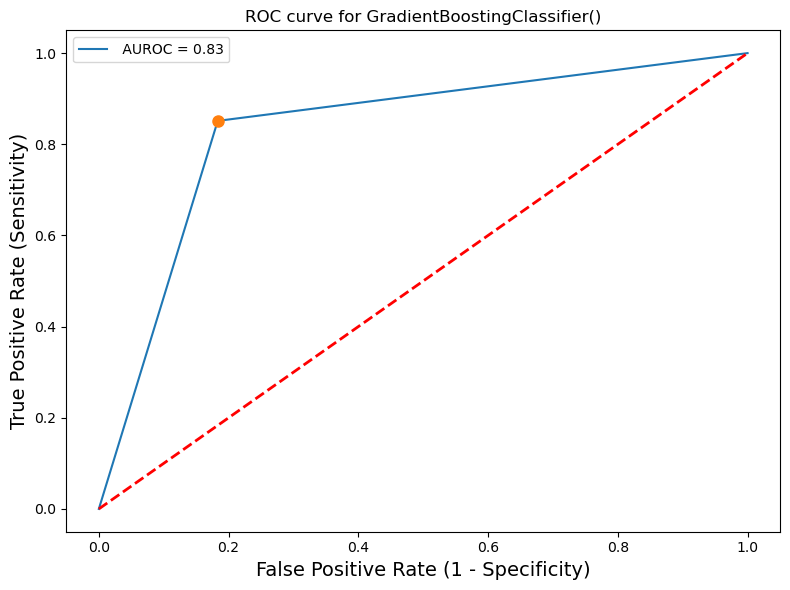

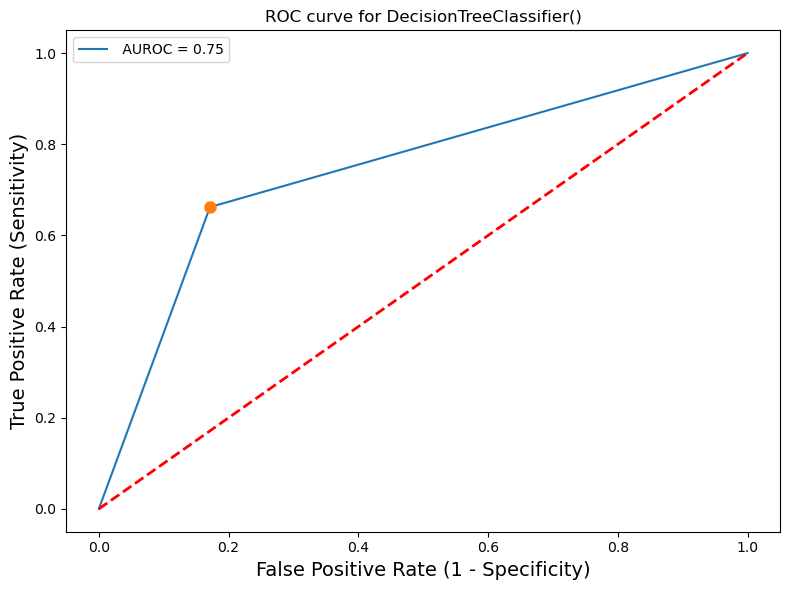

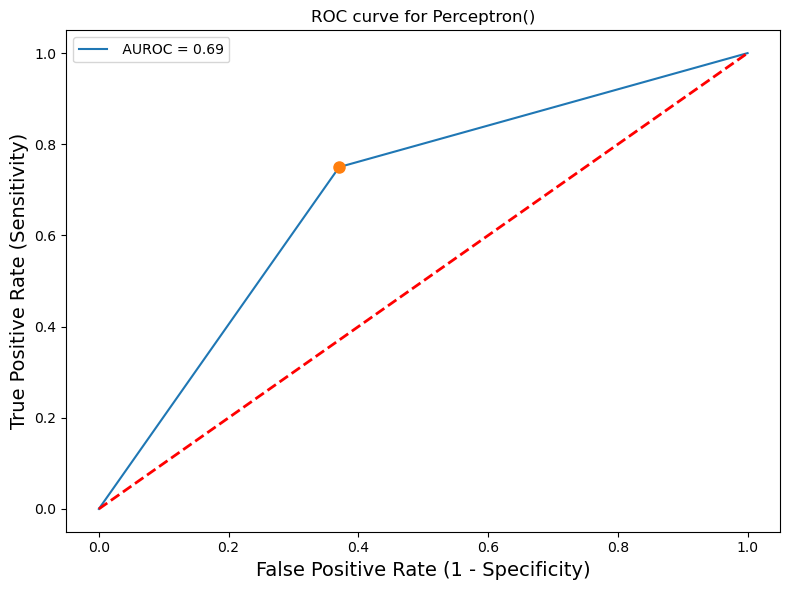

In [123]:
for i in models:
    y_pred = i.predict(X_test)
    sc = accuracy_score(y_pred, y_test)
    ps = precision_score(y_pred, y_test)
    rs = recall_score(y_pred, y_test)
    values.append([i, sc, ps, rs])
    plot_(y_test, y_pred, i)
    # print(f'{i} gives {sc} accuracy, {ps} precision and {rs} recall')


In [210]:
pf = pd.DataFrame(values, columns=index)
pf.to_csv('model_acc.csv')

In [206]:
gra_lr = GradientBoostingClassifier(n_estimators=50,learning_rate=0.022)
gra_lr.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.022, n_estimators=50)

In [207]:
gra_lr_pred = gra_lr.predict(X_test)

In [208]:
metric_score(gra_lr_pred, y_test)

84% accuracy, 90% precision and 73% recall


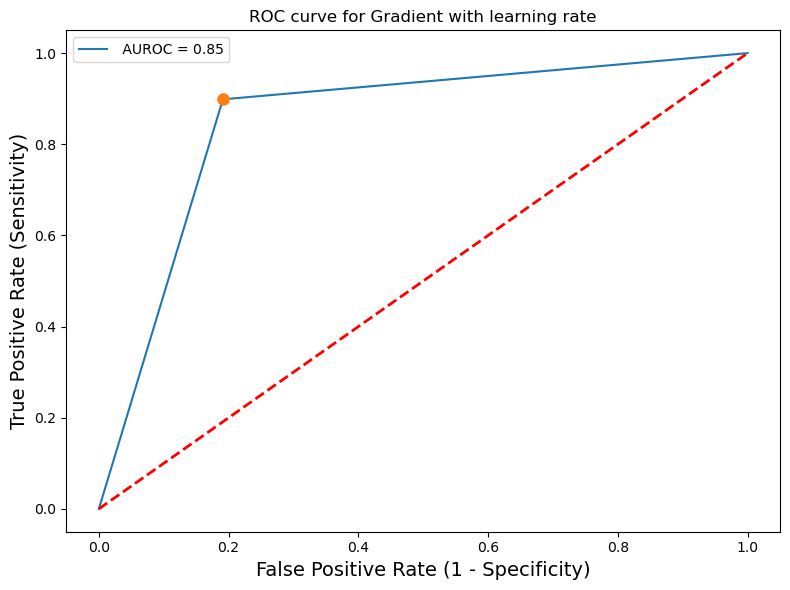

In [209]:
plot_(y_test, gra_lr_pred,'Gradient with learning rate')

In [162]:
pf = pd.DataFrame(values, columns=index)
pf

,model_name,accuracy_score,precision,recall
0,LogisticRegression(),0.769424,0.655405,0.702899
1,"(DecisionTreeClassifier(max_features='auto', r...",0.812030,0.777027,0.732484
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.819549,0.837838,0.720930
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.829574,0.851351,0.732558
4,DecisionTreeClassifier(),0.766917,0.662162,0.695035
5,Perceptron(),0.674185,0.750000,0.544118
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.840000,0.900000,0.730000
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.840000,0.900000,0.730000
8,([DecisionTreeRegressor(criterion='friedman_ms...,0.840000,0.900000,0.730000


67% accuracy, 75% precision and 54% recall
